# Lecture 18

Last time: more slicing of numpy arrays, messing around with images (M, N, 3), histograms. 

Today: Randomness

<br>

Recall one little thing from last time:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
xs = [0,1,2,3]
ys = xs[0:2]
ys[0] = 999
print(xs, ys)

[0, 1, 2, 3] [999, 1]


On the other hand, with numpy arrays:

In [3]:
X = np.array([0,1,2,3])
Y = X[0:2]
Y[0] = 999
print(X, Y)

[999   1   2   3] [999   1]


In lists, slicing always makes a fresh copy, whereas for numpy arrays, slicing makes a reference to that part of the array. This makes sense because if you have some huge dataset, you don't want to copy the whole dataset when you want to look at a slice of it. 

# Randomness

Randomness is used a lot both in mathematics and the real world.

Generally, a random number comes from a probability distribution. 

The distribution might be discrete: i.e. 
it comes from a set 

$$ \{ (x_1, p_1), ..., (x_n, p_n) \},$$

where you get outcome $x_i$ with probability $p_i$. It is assumed that $\sum_i p_i = 1$ (if not you normalize the p's so their sum is 1). The function that takes $x_i \mapsto p_i$ is called the *probability mass function*.

For continuous random numbers, one normally uses a * probability density function*. E.g. the normal distribution comes from the function.

$$ p(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp({-\frac{1}{2}(\frac{x}{\sigma})^2})$$

The probability of a random number from this distribution being in the interval $[a,b]$ is then:

$$\int_a^b p(x)dx$$

Most well known distributions are the uniform distribution and the normal distribution. 

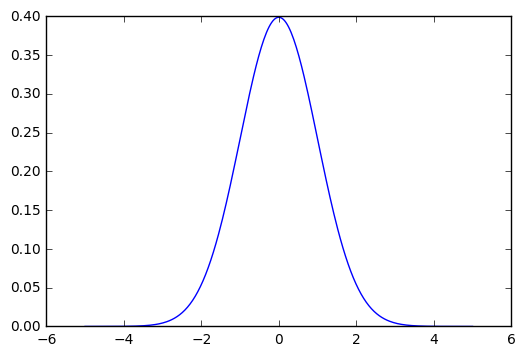

In [4]:
# let's graph the density function of the normal distribution.
from math import pi, sqrt, e
X = np.linspace(-5,5,300)
Y = (lambda x: 1/sqrt(2*pi)*e**(-0.5*x*x))(X)
plt.plot(X, Y)

The easiest distribution is the uniform distribution (all numbers in a given range are equally likely).

In python it's the function random.random() that will produce a random number in $(0,1)$.

In [5]:
import random
random.seed(42)  #optional: the seed will initialize the random number generator
for i in range(15):
    r = random.random()
    print(r)

0.6394267984578837
0.025010755222666936
0.27502931836911926
0.22321073814882275
0.7364712141640124
0.6766994874229113
0.8921795677048454
0.08693883262941615
0.4219218196852704
0.029797219438070344
0.21863797480360336
0.5053552881033624
0.026535969683863625
0.1988376506866485
0.6498844377795232


How would we turn this into random numbers from a to b?

In [6]:
def rnum(a,b):
    return a + (b-a)*random.random()

for i in range(10):
    print(rnum(-1,1))

0.08988296120643335
-0.5591187559186066
0.17853136775181744
0.6188609133556533
-0.987002480643878
0.6116385036656158
0.3962787899764537
-0.31949896696401625
-0.6890410003764369
0.9144261444135624


You can do random arrays in numpy

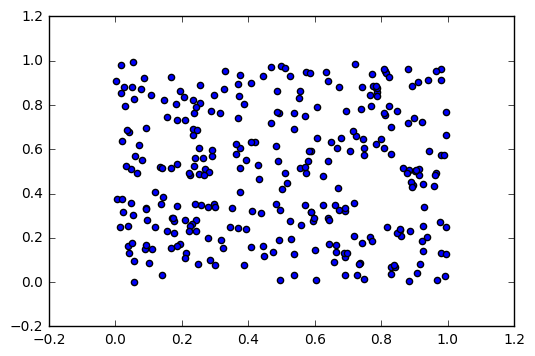

In [7]:
N = 300
X = np.random.uniform(low=0,high=1,size=N)
Y = np.random.uniform(low=0,high=1,size=N)
plt.scatter(X,Y)

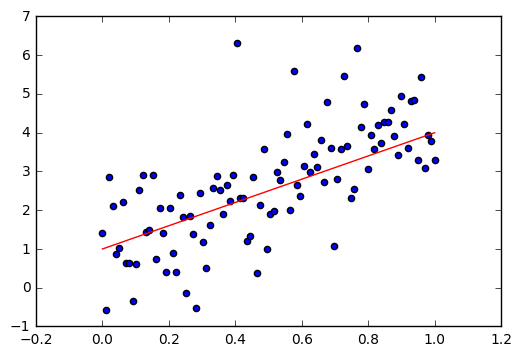

In [8]:
X = np.linspace(0,1,100)
Y = 3 * X + 1

# let's add some noise
Z = 3 * X + 1 + np.random.normal(0,1,X.shape[0])     # we'll see much more about randomness later

plt.scatter(X,Z)  # we use a scatter plot
plt.plot(X,Y, "r")

Let's add random noise to a linear function.

### Getting random integers:

In [9]:
N = 20000
X = np.zeros(N)
for i in range(N):
    X[i] = random.randint(1, 6)   # from 1 to 6 inclusive

print(np.mean(X))

3.52215


## Sampling from the normal distribution

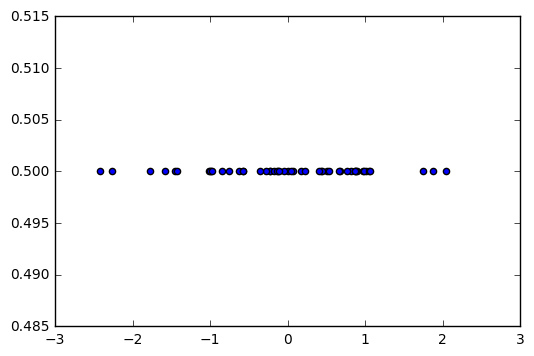

In [10]:
N = 50
X = np.zeros(N)
mu = 0.0
sigma = 1.0
for i in range(N):
    X[i] = random.gauss(mu, sigma)

plt.scatter(X, np.zeros(N) + 0.5)

In [11]:
# numpy version:


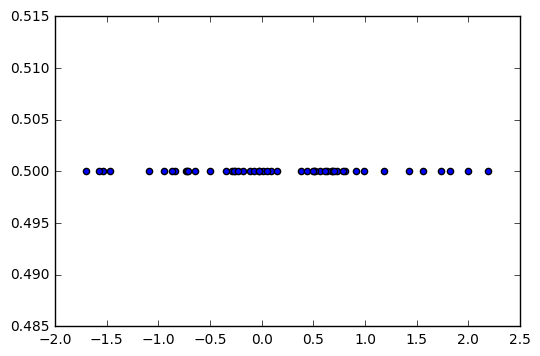

In [12]:
N = 50
mu = 0.0
sigma = 1.0
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.scatter(X, np.zeros(N) + 0.5)

Looks like it's more concentrated around zero. How can we see it better? Histogram.

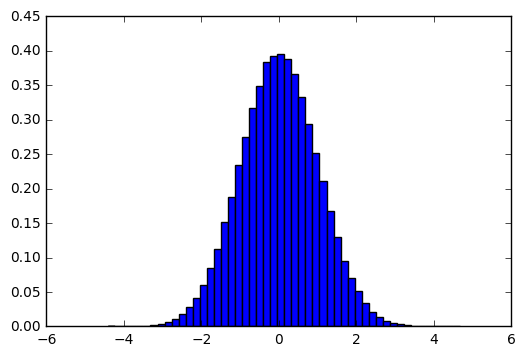

In [13]:
N = 500000
mu = 0.0
sigma = 1.0
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, 0.45])
_,_,_ = plt.hist(X, 50, normed=True)

Sigma is the standard deviation, which measures how wide the normal distribution is. For example:

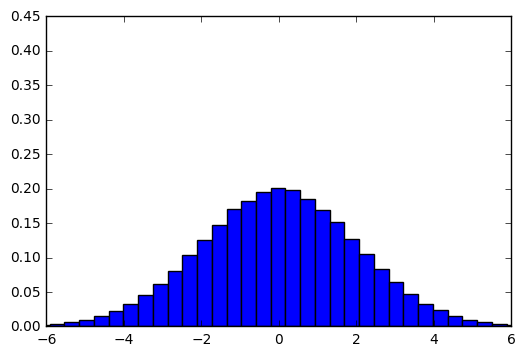

In [14]:
N = 500000
mu = 0.0
sigma = 2.0  # highers standard dev
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, 0.45])
_,_,_ = plt.hist(X, 50, normed=True)

# looks the same but look at the numbers above and below

You can compute the mean and standard deviation of any data:

In [15]:
np.mean(X)

0.0036918262774026595

In [16]:
np.std(X)

2.0004778298106864

In general, if X is my data-set, then the normal distribution withm `mu = np.mean(X)`, and `sigma = np.std(X)` will fit the data best.

If a data distribution normal then **about 68 percent of the data values are within one standard deviation of the mean**.

Histogram of uniform distribution. 

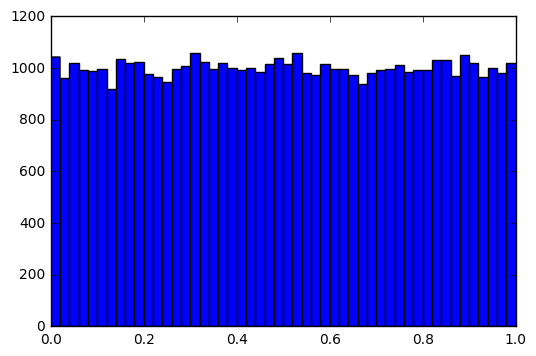

In [17]:
N = 50000
X = np.random.uniform(low=0, high=1, size=N)
_, _, _ = plt.hist(X, 50)

## Modeling a real-life situtation

The bus from my street to work is scheduled at 8:00 A.M. I measured that the bus' arrival time has a Gaussian (normal) distribution with mean 8:05 and a standard deviation of 4 minutes. 

If I miss the bus, the bus after that will come 5 minutes after the first bus (no delays).

When should I get to the bus stop to minimize my total expected waiting time? (I don't care how late I am. I just don't want to wait for the bus at the stop. I'm weird like that.)

Let's simulate. 

my arrival: -20 simulated total waiting time 19.94040275159912
my arrival: -19 simulated total waiting time 18.987051322557537
my arrival: -18 simulated total waiting time 17.955606861558252
my arrival: -17 simulated total waiting time 17.02784210525584
my arrival: -16 simulated total waiting time 16.050915719534203
my arrival: -15 simulated total waiting time 15.030929900262828
my arrival: -14 simulated total waiting time 14.102937629005618
my arrival: -13 simulated total waiting time 13.049834321643809
my arrival: -12 simulated total waiting time 12.165961363079266
my arrival: -11 simulated total waiting time 11.140334459762837
my arrival: -10 simulated total waiting time 10.259096038625225
my arrival: -9 simulated total waiting time 9.634386551613272
my arrival: -8 simulated total waiting time 9.055922519448249
my arrival: -7 simulated total waiting time 8.995871663786557
my arrival: -6 simulated total waiting time 9.393438936209341
my arrival: -5 simulated total waiting time 10.152

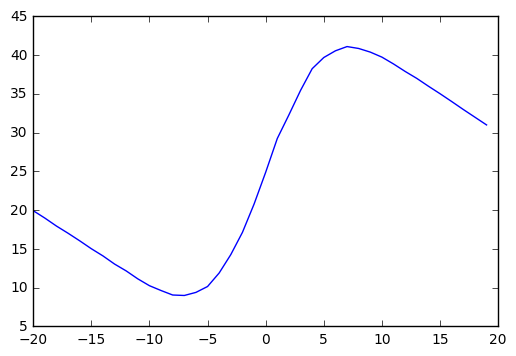

In [4]:
import random
time_till_next_bus = 50
mu = 0  # 8:05 is time 0
sigma = 4
N = 10000  # number of simulations

arrs = []

for my_arrival_at_stop in range(-20,20):
    sum_of_waiting_times = 0.0
    for i in range(N):
        bus_arrival = random.gauss(mu, sigma)
        if my_arrival_at_stop < bus_arrival:
            sum_of_waiting_times += bus_arrival - my_arrival_at_stop
        elif bus_arrival + time_till_next_bus - my_arrival_at_stop > 0:
            sum_of_waiting_times += bus_arrival + time_till_next_bus - my_arrival_at_stop
        # if i missed the next bus too, don't count that one.
            
    print("my arrival:", my_arrival_at_stop, "simulated total waiting time", sum_of_waiting_times / N)
    arrs.append(sum_of_waiting_times / N)
    
plt.plot(range(-20,20), arrs)
    
